In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [2]:
img = imageio.imread('cat-color.png')

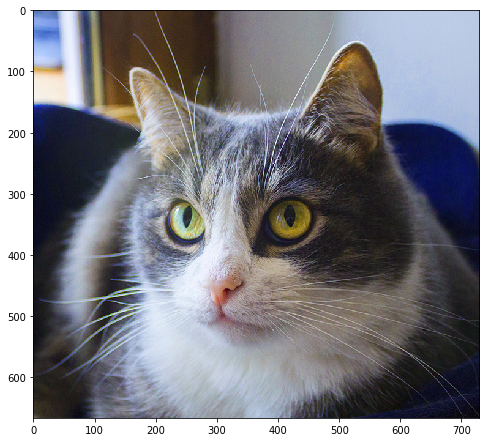

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

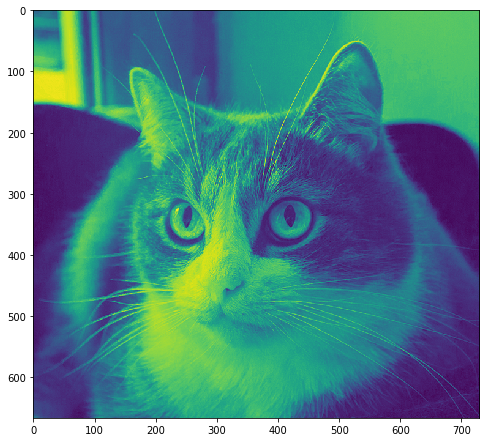

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:,:, 0])

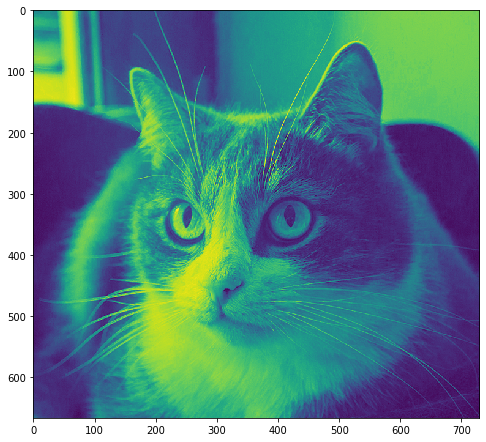

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:,:, 1])

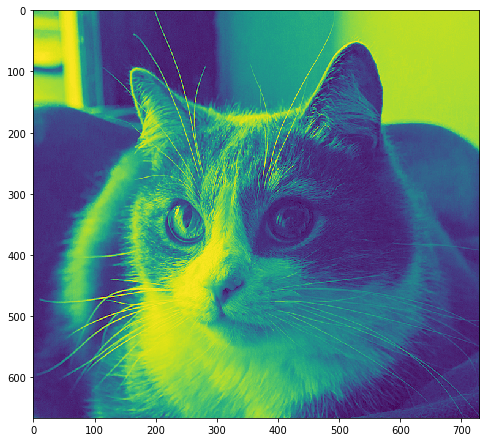

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:,:, 2])

# https://ru.wikipedia.org/wiki/HSL

In [7]:
def rgb_to_hls(x:np.array):
    # hsl == hls == hsi - источник википедия 
    # HLS: Hue, Luminance, Saturation
    # H: тон
    # L: светлота  
    # S: насыщенность
    

    # Получили на вход 
    if x.shape[2] == 3: # трех мерный массив
        if x[:,:, 0].max() > 1: # если он в диапазоне от 0 до 255 конвертируев в диапазон от 0 до 1
            x = x.astype(np.float32) / 255.0
        # Извлекаем значения каждого цвета
        red = x[:, :, 0]
        green = x[:, :, 1]
        blue = x[:, :, 2]


        # светлота
        lightness = np.zeros((green.shape[0], green.shape[1]))
        # насыщенность
        saturation = np.zeros((green.shape[0], green.shape[1]))
        # тон
        hue = np.zeros((green.shape[0], green.shape[1]))

        for row in range(len(red)):
                    for idx in range(len(red[row])):
                        r, g, b = red[row][idx], green[row][idx], blue[row][idx]

                        # максимальные и минимальные значения цвета
                        max_color = max(r, g, b)
                        min_color = min(r, g, b)

                        # светлота l
                        l = (max_color + min_color) / 2.0

                        if max_color == min_color: # Частный случай Мин = Макс
                            # светлота
                            lightness[row][idx] = l
                            # насыщенность
                            saturation[row][idx] = 0
                            # тон
                            hue[row][idx] = 0
                             # Когда минимальный и максимальный цвета RGB равны между собой то 
                             # согласно статье в вкипедии у нас есть только светлота тон и насыщеность равны 0
                            continue
                        

                        # насыщенность s
                        # Частный случай светлота меньше или равна 0.5 и больше 0 
                        if l <= 0.5: # У нас в теории все значения были в диапазоне от 0 до 255 по этому условие проверку на больше нуля не делаем
                            s = (max_color - min_color) / (max_color + min_color) # Получили насыщенность
                        else: # первые два варианта проработали так что для третьего варинта прописывать условия нет необходимости
                            s = (max_color - min_color) / (2.0 - max_color - min_color)



                        # тон h
                        # Реализуем формулу для тона
                        if max_color == g: # если максимальный цвет зеленый
                            h = 60 * (g - b ) / (max_color - min_color) + 120.00
                        elif max_color == b: # если максимальный цвет синий
                            h = 60 * (r - g) / (max_color - min_color) + 240.00
                        else:  # если максимальный цвет красный
                            if g >= b:  # и зеленый больше или равен синему
                                h = 60 * (g - b) / (max_color - min_color)  + 0.0 
                            else: # и зеленый меньше синего
                                h = 60 * (g - b) / (max_color - min_color)  + 360.0 

                        # финальная часть присвоить значения для каждого пикселя
                        lightness[row][idx] = l
                        # насыщенность
                        saturation[row][idx] = s
                        # тон
                        hue[row][idx] = h / 360 # это чтобы не ругася plt, но будет работать и без этого (м.б. без этого еще и правильнеее)
        
        return np.transpose(np.array([hue, saturation,lightness] ),
                            (1, 2, 0) )

In [8]:
x = rgb_to_hls(np.copy(img))

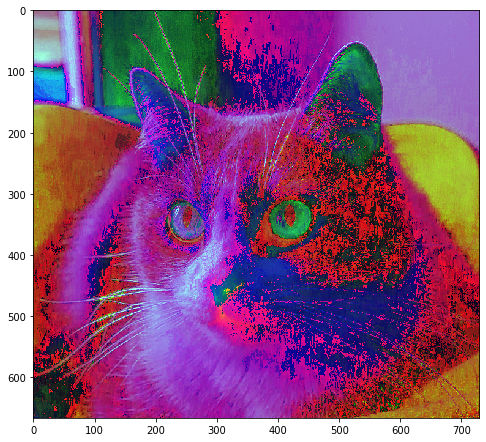

In [9]:
plt.figure(figsize=(8, 8)) # Вроде де то оно правда отображение то идет все равно по схеме RGB
plt.imshow(x)

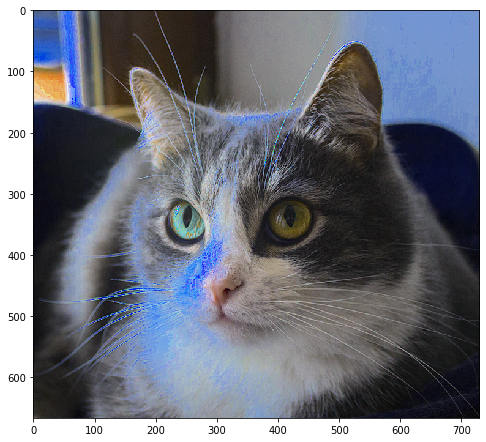

In [15]:
from matplotlib.colors import hsv_to_rgb
plt.figure(figsize=(8, 8)) # hsv не тоже самое что hls но все же попробуем
plt.imshow(hsv_to_rgb(x)) # вполне себе не плохо

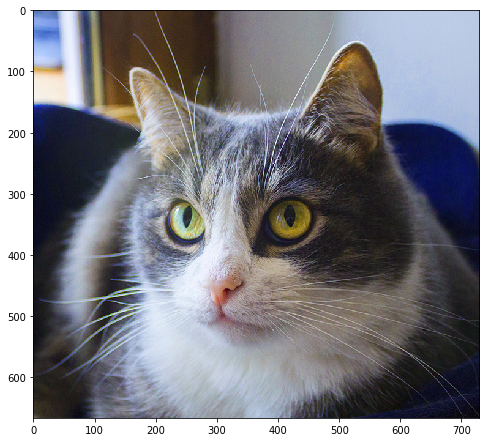

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [11]:
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3

In [12]:
from matplotlib.colors import rgb_to_hsv

In [13]:
hsv = rgb_to_hsv(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


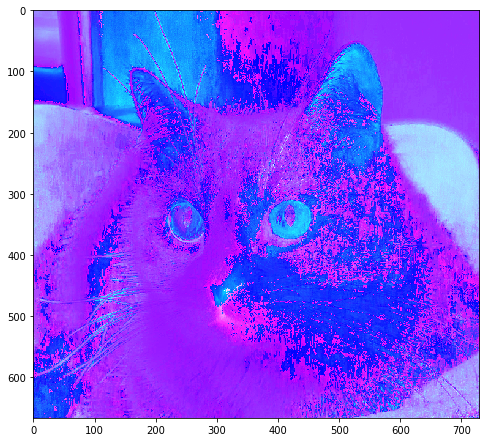

In [14]:
plt.figure(figsize=(8, 8)) 
plt.imshow(hsv) # видим что тут картинка по нитереснее получилась,
# утешаем себя тем что это судя по той же статье в википедии не одно и тоже, хотя наверно близко

In [16]:
def rgb_to_hls_2(x:np.array):
    # hsl == hls == hsi - источник википедия 
    # HLS: Hue, Luminance, Saturation
    # H: тон
    # L: светлота  
    # S: насыщенность
    

    # Получили на вход 
    if x.shape[2] == 3: # трех мерный массив
        if x[:,:, 0].max() > 1: # если он в диапазоне от 0 до 255 конвертируев в диапазон от 0 до 1
            x = x.astype(np.float32) / 255.0
        # Извлекаем значения каждого цвета
        red = x[:, :, 0]
        green = x[:, :, 1]
        blue = x[:, :, 2]


        # светлота
        lightness = np.zeros((green.shape[0], green.shape[1]))
        # насыщенность
        saturation = np.zeros((green.shape[0], green.shape[1]))
        # тон
        hue = np.zeros((green.shape[0], green.shape[1]))

        for row in range(len(red)):
                    for idx in range(len(red[row])):
                        r, g, b = red[row][idx], green[row][idx], blue[row][idx]

                        # максимальные и минимальные значения цвета
                        max_color = max(r, g, b)
                        min_color = min(r, g, b)

                        # светлота l
                        l = (max_color + min_color) / 2.0

                        if max_color == min_color: # Частный случай Мин = Макс
                            # светлота
                            lightness[row][idx] = l
                            # насыщенность
                            saturation[row][idx] = 0
                            # тон
                            hue[row][idx] = 0
                             # Когда минимальный и максимальный цвета RGB равны между собой то 
                             # согласно статье в вкипедии у нас есть только светлота тон и насыщеность равны 0
                            continue
                        

                        # насыщенность s
                        # Частный случай светлота меньше или равна 0.5 и больше 0 
                        if l <= 0.5: # У нас в теории все значения были в диапазоне от 0 до 255 по этому условие проверку на больше нуля не делаем
                            s = (max_color - min_color) / (max_color + min_color) # Получили насыщенность
                        else: # первые два варианта проработали так что для третьего варинта прописывать условия нет необходимости
                            s = (max_color - min_color) / (2.0 - max_color - min_color)



                        # тон h
                        # Реализуем формулу для тона
                        if max_color == g: # если максимальный цвет зеленый
                            h = 60 * (g - b ) / (max_color - min_color) + 120.00
                        elif max_color == b: # если максимальный цвет синий
                            h = 60 * (r - g) / (max_color - min_color) + 240.00
                        else:  # если максимальный цвет красный
                            if g >= b:  # и зеленый больше или равен синему
                                h = 60 * (g - b) / (max_color - min_color)  + 0.0 
                            else: # и зеленый меньше синего
                                h = 60 * (g - b) / (max_color - min_color)  + 360.0 

                        # финальная часть присвоить значения для каждого пикселя
                        lightness[row][idx] = l
                        # насыщенность
                        saturation[row][idx] = s
                        # тон
                        hue[row][idx] = h  # это чтобы не ругася plt, но будет работать и без этого (м.б. без этого еще и правильнеее)
        
        return np.transpose(np.array([hue, saturation,lightness] ),
                            (1, 2, 0) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


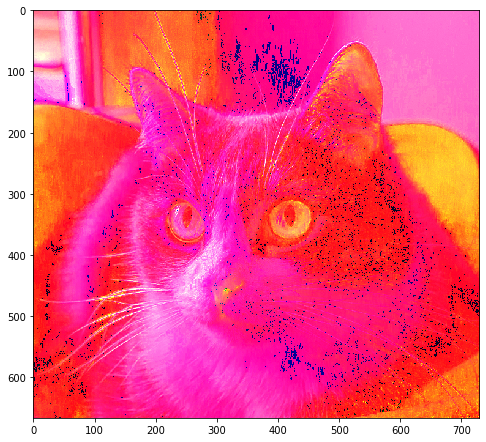

In [18]:
z = rgb_to_hls_2(np.copy(img))
plt.figure(figsize=(8, 8)) # Вроде де то оно правда отображение то идет все равно по схеме RGB
plt.imshow(z) # тут уже что то более похожее на предыдущий слайд, было бы хорошо найти какой то рабочий алгоритм для hls но я не успел найти ничего